<h1 align='center'>601 FINAL PROJECT</h1>

The two datasets used here are obtained from California Open Data Portal.

The datasets contains information about revenue and operating margin of the hospitals from 2010-2015.

Both the datasets contain some common columns, like:

<strong>Year</strong>, Year in which the data is recorded<br>
<strong>OSHPD_ID</strong>, A unique six-digit identifier assigned to each facility<br>
<strong>Facility Name</strong>, The hospital name<br>
<strong>County</strong>, The county where the hospital is located<br>
<strong>Type of Ownership</strong>, Denotes the type of ownership and/or legal organization of a hospital licensee<br> 
<strong>Hospital Type</strong>, Indicates if a hospital's report contains comparable data<br>
<strong>Teaching</strong>, Indicates if the hospital is a teaching hospital<br>
<strong>Small/Rural</strong>, Indicates if the hospital is considered a small and rural hospital<br>
<strong>Licensed Beds</strong>, The number of licensed bedsstated on the hospital license at the end of the reporting period<br>
<strong>Available Beds</strong>, The average daily complement of beds physically existing and actually available for overnight use<br>
<strong>Staffed Beds</strong>, average daily complement of beds (excluding nursery bassinets) that are set-up, staffed<br>
<strong>Location</strong>, Location where hospital is located<br>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
#importing Libraries

<h4>The first dataset</h4>

Importing Dataset 1 : <strong>"four quarter summary hospital utilization operating revenue and profit margins"</strong>



The dataset is obtained from : 
https://data.ca.gov/dataset/four-quarter-summary-hospital-utilization-operating-revenue-and-profit-margins1

This has information about different hospitals located in the california state. The main columns in this dataset are<br>
<strong>Pretax Net Income</strong>, Net Patient Revenue + Other Patient Revenue – Total Operating Expenses + Net Non-operating Revenue and Expenses<br>
<strong>Other Operating Rev</strong>, Revenue generated by health care operations from non-patient care services to patients and others<br>
<strong>Total Operating Rev</strong>, Total income derived from sources related to a hospital's everyday business operations<br>
<strong>Total Margin</strong>, Financial calculation determined by Pre-Tax Net Income divided by Total Operating Revenue then times the total by 100<br>
<strong>Operating Margin</strong>, Financial calculation determined by Net from Operations divided by Total Operating Revenue then times the total by 100<br>

The revenue data here is given for every year(2010-2015) for different facility names

In [2]:
#importing dataset1
ProfitMargin = pd.read_csv('four-quarter-summary-hospital-utilization-operating-revenue-and-profit-margins-.csv')
ProfitMargin.shape 

(2463, 17)

<h4>The second dataset</h4>

Importing Dataset 2 : <strong>"four quarter summary hospital utilization patient days by type of ownership"</strong>


The dataset is obtained from : 
https://data.ca.gov/dataset/four-quarter-summary-hospital-utilization-patient-days-by-type-of-ownership1

This has information about different hospitals located in the california state. The main columns in this dataset are<br>
<strong>Patient Days by Payer</strong>, The number of census days by payer that all formally admitted inpatients spent in the hospital during the reporting period<br>
<strong>Total Patient Days</strong>, The number of census days that all formally admitted inpatients spent in the hospital during the reporting period<br>
<strong>Total Patient Days Percent</strong>,The percentage of census days by payer that all formally admitted inpatients spent in the hospital during the reporting period<br>
<strong>Payer</strong>, Annual and Quarterly Reports include financial and utilization data by payer category, which is defined as the third-party or individual who is responsible for the predominant portion of a patient's bill<br>
<strong>LTC Patient Days</strong>, Hospitals which provide skilled nursing care, intermediate care, sub-acute care, and other long-term care services<br>



The revenue data here is given for every year(2010-2015) for different facility names, The data is divided based on the type of payer. For each year there may be 4 or 5 entries based on type of payers

In [3]:
#importing dataset2
Ownership = pd.read_csv('four-quarter-summary-hospital-utilization-patient-days-by-type-of-ownership-.csv')
Ownership.shape

(11556, 17)

<h3>Finding Null Values</h3> 

In [4]:
ProfitMargin.isna().sum()    
#finding null values of dataset1

Year                      0
OSHPD_ID                  0
Facility Name             0
County                    0
Type of Ownership         0
Hospital Type             0
Teaching               2289
Small/Rural            2095
Licensed Beds             0
Available Beds            0
Staffed Beds              0
Pretax Net Income         0
Other Operating Rev       0
Total Operating Rev       0
Total Margin              0
Operating Margin          0
Location                  0
dtype: int64

In [5]:
#finding null values of dataset2
Ownership.isna().sum()

Year                              0
OSHPD_ID                          0
Facility Name                     0
County                            0
Type of Ownership                 0
Hospital Type                     0
Teaching                      10639
Small/Rural                    9838
Licensed Beds                     0
Available Beds                    0
Staffed Beds                      0
Patient Days by Payer             0
Total Patient Days                0
Total Patient Days Percent        0
Payer                             0
LTC Patient Days                  0
Location                          0
dtype: int64

In [6]:
print('Unique Values in dataset 1 \n\n\n',ProfitMargin.nunique()) #to find unique values of each column

Unique Values in dataset 1 


 Year                      6
OSHPD_ID                433
Facility Name           622
County                  112
Type of Ownership         5
Hospital Type             6
Teaching                  1
Small/Rural               2
Licensed Beds           416
Available Beds          461
Staffed Beds            462
Pretax Net Income      2451
Other Operating Rev    2254
Total Operating Rev    2463
Total Margin            208
Operating Margin        240
Location                256
dtype: int64


In [7]:
print('Unique Values in dataset 2 \n\n\n',Ownership.nunique())

Unique Values in dataset 2 


 Year                             6
OSHPD_ID                       470
Facility Name                  693
County                         112
Type of Ownership                5
Hospital Type                    7
Teaching                         1
Small/Rural                      2
Licensed Beds                  455
Available Beds                 516
Staffed Beds                   610
Patient Days by Payer         7478
Total Patient Days            2610
Total Patient Days Percent     935
Payer                            5
LTC Patient Days               374
Location                       261
dtype: int64


Dropping duplicate columns inorder to prevent from forming suffix-columns while merging two datasets

In [8]:
#dropping columns from one dataset which are of no use while joining to stop duplicating
PM1=ProfitMargin.drop(['Hospital Type','Teaching','Small/Rural','Licensed Beds','Available Beds','Staffed Beds','Location'],axis=1)


Merging the Ownership dataframe with the modified ProfitMargin dataframe

In [9]:
#merging two datasets
df_merged = Ownership.merge(PM1, left_on=['Year','OSHPD_ID','Facility Name', 
                                          'County','Type of Ownership'],  
    right_on=['Year','OSHPD_ID','Facility Name','County','Type of Ownership'],how='outer')

In [10]:
df_merged.columns

Index(['Year', 'OSHPD_ID', 'Facility Name', 'County', 'Type of Ownership',
       'Hospital Type', 'Teaching', 'Small/Rural', 'Licensed Beds',
       'Available Beds', 'Staffed Beds', 'Patient Days by Payer',
       'Total Patient Days', 'Total Patient Days Percent', 'Payer',
       'LTC Patient Days', 'Location', 'Pretax Net Income',
       'Other Operating Rev', 'Total Operating Rev', 'Total Margin',
       'Operating Margin'],
      dtype='object')

No duplicate columns are formed

In [11]:
df_merged

,Year,OSHPD_ID,Facility Name,County,Type of Ownership,Hospital Type,Teaching,Small/Rural,Licensed Beds,Available Beds,...,Total Patient Days,Total Patient Days Percent,Payer,LTC Patient Days,Location,Pretax Net Income,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin
0,2012,106100899,ST. AGNES MEDICAL CENTER,Fresno,Non-Profit,Comparable,NaN,NaN,436.0,436.0,...,99489,57.4%,Medicare,0,"FRESNO, California\n(36.731654, -119.785856)",398558302.0,$9522679.00,$408080981.00,2.3%,2.4%
1,2012,106100899,ST. AGNES MEDICAL CENTER,Fresno,Non-Profit,Comparable,NaN,NaN,436.0,436.0,...,99489,0.3%,Other Payers,0,"FRESNO, California\n(36.731654, -119.785856)",398558302.0,$9522679.00,$408080981.00,2.3%,2.4%
2,2012,106100899,ST. AGNES MEDICAL CENTER,Fresno,Non-Profit,Comparable,NaN,NaN,436.0,436.0,...,99489,18.4%,Other 3rd Party (Private Ins.),0,"FRESNO, California\n(36.731654, -119.785856)",398558302.0,$9522679.00,$408080981.00,2.3%,2.4%
3,2012,106100899,ST. AGNES MEDICAL CENTER,Fresno,Non-Profit,Comparable,NaN,NaN,436.0,436.0,...,99489,1.8%,County/Other Indigent,0,"FRESNO, California\n(36.731654, -119.785856)",398558302.0,$9522679.00,$408080981.00,2.3%,2.4%
4,2012,106100899,ST. AGNES MEDICAL CENTER,Fresno,Non-Profit,Comparable,NaN,NaN,436.0,436.0,...,99489,22.1%,MediCal,0,"FRESNO, California\n(36.731654, -119.785856)",398558302.0,$9522679.00,$408080981.00,2.3%,2.4%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,2012,106191225,TOM REDGATE MEMORIAL RECOVERY CENTER,Los Angeles,Non-Profit,Comparable,NaN,NaN,63.0,63.0,...,13169,100%,County/Other Indigent,0,"LONG BEACH, California\n(33.767168, -118.193723)",2729770.0,$38253.00,$2768023.00,1.4%,1.4%
11552,2013,106344170,CRESTWOOD PHF - CARMICHAEL,Sacramento,Investor,Psychiatric Health Facilities,NaN,NaN,16.0,16.0,...,5650,100%,County/Other Indigent,0,"CARMICHAEL, California\n(38.636604, -121.327265)",3902357.0,$130263.00,$4032620.00,3.2%,3.3%
11553,2013,106194967,STAR VIEW ADOLESCENT - PHF,Los Angeles,Investor,Psychiatric Health Facilities,NaN,NaN,16.0,16.0,...,5409,100%,County/Other Indigent,0,"TORRANCE, California\n(33.836318, -118.340038)",3337033.0,$3626559.00,$6963592.00,52.1%,108.7%
11554,2011,106194967,STAR VIEW ADOLESCENT - PHF,Los Angeles,Investor,Psychiatric Health Facilities,NaN,NaN,16.0,16.0,...,5024,100%,County/Other Indigent,0,"TORRANCE, California\n(33.836318, -118.340038)",2733283.0,$2757702.00,$5490985.00,50.2%,100.9%


In [12]:
df_merged.nunique()

Year                             6
OSHPD_ID                       470
Facility Name                  693
County                         112
Type of Ownership                5
Hospital Type                    7
Teaching                         1
Small/Rural                      2
Licensed Beds                  455
Available Beds                 516
Staffed Beds                   610
Patient Days by Payer         7478
Total Patient Days            2610
Total Patient Days Percent     935
Payer                            5
LTC Patient Days               374
Location                       261
Pretax Net Income             2451
Other Operating Rev           2254
Total Operating Rev           2463
Total Margin                   208
Operating Margin               240
dtype: int64

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11556 entries, 0 to 11555
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        11556 non-null  int64  
 1   OSHPD_ID                    11556 non-null  int64  
 2   Facility Name               11556 non-null  object 
 3   County                      11556 non-null  object 
 4   Type of Ownership           11556 non-null  object 
 5   Hospital Type               11556 non-null  object 
 6   Teaching                    917 non-null    object 
 7   Small/Rural                 1718 non-null   object 
 8   Licensed Beds               11556 non-null  float64
 9   Available Beds              11556 non-null  float64
 10  Staffed Beds                11556 non-null  float64
 11  Patient Days by Payer       11556 non-null  object 
 12  Total Patient Days          11556 non-null  int64  
 13  Total Patient Days Percent  115

In [14]:
df_merged.describe(include='object')

,Facility Name,County,Type of Ownership,Hospital Type,Teaching,Small/Rural,Patient Days by Payer,Total Patient Days Percent,Payer,Location,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin
count,11556,11556,11556,11556,917,1718,11556,11556,11556,11556,10788,10788,10788,10788
unique,693,112,5,7,1,2,7478,935,5,261,2254,2463,208,240
top,EDEN MEDICAL CENTER,Los Angeles,Non-Profit,Comparable,Teaching,Rural,$1.00,0.2%,Other 3rd Party (Private Ins.),"LOS ANGELES, California\n(34.052238, -118.243344)",$0.00,$408080981.00,0%,0%
freq,35,2344,6402,10261,917,1420,34,198,2515,655,541,5,725,748


In [15]:
df_merged.describe()

,Year,OSHPD_ID,Licensed Beds,Available Beds,Staffed Beds,Total Patient Days,LTC Patient Days,Pretax Net Income
count,11556.000000,1.155600e+04,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,1.078800e+04
mean,2012.485462,1.062816e+08,234.126320,215.535436,171.681301,48370.337920,3184.084978,2.196624e+08
std,1.700372,1.376806e+05,212.199273,189.094969,157.306409,50337.035986,11255.554570,3.063264e+08
min,2010.000000,1.060107e+08,9.000000,7.000000,0.000000,3.000000,0.000000,0.000000e+00
25%,2011.000000,1.061903e+08,85.000000,82.000000,62.000000,15769.000000,0.000000,4.523637e+07
50%,2012.000000,1.063012e+08,173.000000,165.000000,131.000000,34874.000000,0.000000,1.155864e+08
75%,2014.000000,1.063714e+08,342.000000,316.000000,238.000000,67666.000000,0.000000,2.977553e+08
max,2015.000000,1.065810e+08,1500.000000,1527.000000,1550.000000,557001.000000,153444.000000,3.304376e+09


In [16]:

df_merged['Other Operating Rev'] = df_merged['Other Operating Rev'].str.replace('$',"").astype(float)
df_merged['Total Operating Rev'] = df_merged['Total Operating Rev'].str.replace('$',"").astype(float)
df_merged['Total Patient Days Percent'] = df_merged['Total Patient Days Percent'].str.rstrip('%').astype('float')
df_merged['Total Margin'] = df_merged['Total Margin'].str.rstrip('%').astype('float')
df_merged['Operating Margin'] = df_merged['Operating Margin'].str.rstrip('%').astype('float')
df_merged['Patient Days by Payer']=df_merged['Patient Days by Payer'].replace({r"\$":""},regex=True).astype(float)


/var/folders/3n/3pl2gdtn4_ndqxz4z7_fyd9m0000gn/T/ipykernel_76376/1773241349.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['Other Operating Rev'] = df_merged['Other Operating Rev'].str.replace('$',"").astype(float)
/var/folders/3n/3pl2gdtn4_ndqxz4z7_fyd9m0000gn/T/ipykernel_76376/1773241349.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['Total Operating Rev'] = df_merged['Total Operating Rev'].str.replace('$',"").astype(float)


In [17]:
df_merged.describe()

,Year,OSHPD_ID,Licensed Beds,Available Beds,Staffed Beds,Patient Days by Payer,Total Patient Days,Total Patient Days Percent,LTC Patient Days,Pretax Net Income,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin
count,11556.000000,1.155600e+04,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,1.078800e+04,1.078800e+04,1.078800e+04,10788.000000,10788.000000
mean,2012.485462,1.062816e+08,234.126320,215.535436,171.681301,10987.960627,48370.337920,22.957788,3184.084978,2.196624e+08,9.617180e+06,2.292796e+08,3.093585,3.141648
std,1.700372,1.376806e+05,212.199273,189.094969,157.306409,24980.007346,50337.035986,24.091193,11255.554570,3.063264e+08,2.643455e+07,3.247614e+08,6.571565,7.362706
min,2010.000000,1.060107e+08,9.000000,7.000000,0.000000,-232.000000,3.000000,-0.500000,0.000000,0.000000e+00,-5.713709e+06,4.028900e+04,-6.300000,-53.800000
25%,2011.000000,1.061903e+08,85.000000,82.000000,62.000000,628.000000,15769.000000,2.500000,0.000000,4.523637e+07,3.551860e+05,4.592988e+07,0.600000,0.500000
50%,2012.000000,1.063012e+08,173.000000,165.000000,131.000000,3199.000000,34874.000000,14.300000,0.000000,1.155864e+08,1.674445e+06,1.185455e+08,1.500000,1.400000
75%,2014.000000,1.063714e+08,342.000000,316.000000,238.000000,13104.750000,67666.000000,39.300000,0.000000,2.977553e+08,6.074410e+06,3.067331e+08,3.100000,3.100000
max,2015.000000,1.065810e+08,1500.000000,1527.000000,1550.000000,552968.000000,557001.000000,100.000000,153444.000000,3.304376e+09,3.259655e+08,3.381915e+09,100.000000,143.600000


In [18]:
df_merged.dtypes

Year                            int64
OSHPD_ID                        int64
Facility Name                  object
County                         object
Type of Ownership              object
Hospital Type                  object
Teaching                       object
Small/Rural                    object
Licensed Beds                 float64
Available Beds                float64
Staffed Beds                  float64
Patient Days by Payer         float64
Total Patient Days              int64
Total Patient Days Percent    float64
Payer                          object
LTC Patient Days                int64
Location                       object
Pretax Net Income             float64
Other Operating Rev           float64
Total Operating Rev           float64
Total Margin                  float64
Operating Margin              float64
dtype: object

In [19]:
df_merged.isna().sum() #to find null values in each column

Year                              0
OSHPD_ID                          0
Facility Name                     0
County                            0
Type of Ownership                 0
Hospital Type                     0
Teaching                      10639
Small/Rural                    9838
Licensed Beds                     0
Available Beds                    0
Staffed Beds                      0
Patient Days by Payer             0
Total Patient Days                0
Total Patient Days Percent        0
Payer                             0
LTC Patient Days                  0
Location                          0
Pretax Net Income               768
Other Operating Rev             768
Total Operating Rev             768
Total Margin                    768
Operating Margin                768
dtype: int64

In [20]:
df_merged['Teaching'].unique()

array([nan, 'Teaching'], dtype=object)

The Teaching column is a boolean value, where the hospital is either a Teaching facility or Not a Teaching facility. Hence, replacing it with None.

In [21]:
df_merged['Teaching'].fillna('None',inplace=True)
df_merged['Teaching'].value_counts()

None        10639
Teaching      917
Name: Teaching, dtype: int64

In order to get the location where hospital is situation, we can make use of location column. This column contains extra values like coordinates and state. We can split this to get a new column called Loc

In [22]:
df_merged['Loc'] = df_merged['Location'].str.split(',',expand=True)[0]

In [23]:
df_merged['County'].value_counts()

Los Angeles       2344
Orange             702
San Diego          586
San Bernardino     528
LOS ANGELES        481
                  ... 
SAN BENITO           5
MONO                 5
DEL NORTE            5
YUBA                 5
LASSEN               4
Name: County, Length: 112, dtype: int64

There are some "Case" errors in the county column, so I have changed all the values into Sentence case

In [24]:
df_merged['County'] = df_merged['County'].str.upper().str.title()

As the merged dataframe contains more than 17 columns, it would be difficult to look into some of the data, So I created a new dataframe taking some columns which can be useful for analyzing

In [25]:
new_df =df_merged[['Year','Facility Name','Total Patient Days','Patient Days by Payer','Payer','Pretax Net Income','Other Operating Rev','Total Operating Rev','Total Margin','Operating Margin']]

The data here is duplicated in terms of "Year" and "Payer". Inorder to get some insights about the hospitals given, I have dropped all the duplicate rows that contain same "Facility Name"

In [26]:
df2 = df_merged.drop_duplicates(subset=['Facility Name'])

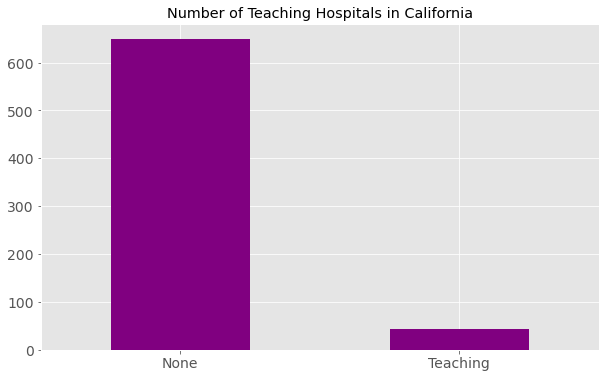

In [27]:
#graph to show how many teaching hospitals are there in california
df2['Teaching'].value_counts().plot(kind='bar',
                                       figsize = (10,6),
                                   grid=True,
                                   title = 'Number of Teaching Hospitals in California',
                                   color = 'purple',
                                   rot = '0',
                                   fontsize = 14)
plt.show()  

Only around 50 hospitals out of 693 hospitals listed are teaching/training centres 

In [28]:
df2['Small/Rural'].fillna('Not Mentioned',inplace=True)

In [29]:
df2['Small/Rural'].value_counts()

Not Mentioned    614
Rural             57
Small             22
Name: Small/Rural, dtype: int64

In [30]:
df2['Type of Ownership'].value_counts()

Non-Profit     373
Investor       215
District        51
City/County     44
State           10
Name: Type of Ownership, dtype: int64

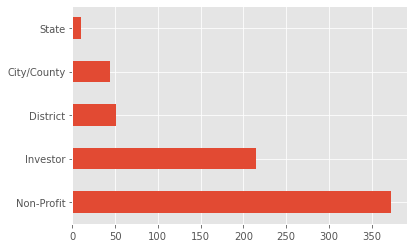

In [31]:
#plot to find out distribution of ownership of hospitals in california

df2['Type of Ownership'].value_counts().plot(kind='barh') 
plt.show()

The majority of hospitals in california are maintained by Non-Profit Organizations. While the state government owns very least number of hospitals

<AxesSubplot:>

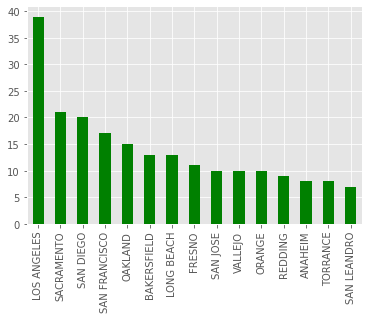

In [32]:
df2['Loc'].value_counts().head(15).plot(kind='bar',
                                       color = 'green')

As the most populous cities in california, Los Angeles and Sacremento has the most number of hospitals.

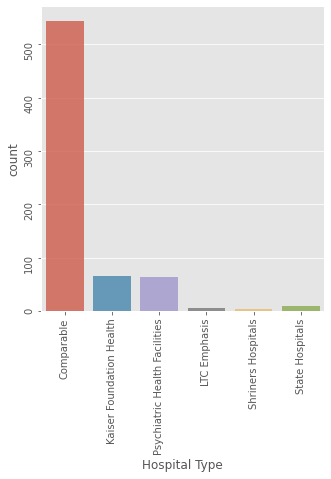

In [33]:
plot = sns.catplot(data=df2,x='Hospital Type',kind='count',aspect = 1,height = 5,alpha=0.8)
plot.ax.tick_params(labelrotation = 90)

A lot of hospitals in california are comparable, which can be made use by the doctors when treating the patients who were earlier treated from other hospitals

In [34]:
print("The number of hospitals that cannot provide skilled long term nursing care are :",df2[df2['LTC Patient Days'] == 0]['LTC Patient Days'].count())
print("The number of hospitals that can provide skilled long term nursing care are :",df2[df2['LTC Patient Days'] != 0]['LTC Patient Days'].count())

The number of hospitals that cannot provide skilled long term nursing care are : 607
The number of hospitals that can provide skilled long term nursing care are : 86


In [35]:
df2['County'].value_counts().head(15)

Los Angeles       170
Orange             48
San Diego          37
Alameda            37
San Bernardino     33
Riverside          30
Sacramento         30
Santa Clara        23
Fresno             19
Kern               18
San Francisco      17
Ventura            16
Solano             16
Contra Costa       15
Sonoma             13
Name: County, dtype: int64

In [36]:
print('Total Number of licensed beds in california :',df2['Licensed Beds'].sum().astype(int))    

Total Number of licensed beds in california : 147525


In [37]:
#to print the dataframe whose available beds are less than that of licensed beds
f = df2[df2['Licensed Beds'] != df2['Available Beds']]
f[['Facility Name','Licensed Beds','Available Beds']].sort_values(by=['Licensed Beds','Available Beds']).reset_index().drop(['index'],axis=1)

,Facility Name,Licensed Beds,Available Beds
0,CRESTWOOD PHF-2,16.0,7.0
1,CENTRAL STAR PHF,16.0,12.0
2,SHARP MCDONALD CENTER,16.0,14.0
3,SHARP VISTA PACIFICA,16.0,14.0
4,TEHACHAPI HOSPITAL,25.0,24.0
...,...,...,...
220,LANTERMAN STATE HOSPITAL AND DEVELOPMENT,1286.0,1258.0
221,PATTON STATE HOSPITAL,1287.0,1515.0
222,NAPA STATE HOSPITAL,1362.0,1229.0
223,SONOMA DEVELOPMENTAL CENTER,1413.0,1388.0


In about 225 facilities in california, a lot of beds are availble for immediate use for patients

In [38]:
df2[['Available Beds','Staffed Beds']]

,Available Beds,Staffed Beds
0,436.0,436.0
5,110.0,110.0
10,128.0,128.0
14,22.0,22.0
19,127.0,78.0
...,...,...
11535,16.0,16.0
11536,16.0,16.0
11541,16.0,16.0
11542,16.0,16.0


In [39]:
df_merged[['Facility Name','Total Patient Days Percent','Payer']].groupby('Facility Name').mean().sort_values(by='Total Patient Days Percent')

,Total Patient Days Percent
Facility Name,
ST. JOHNS REGIONAL MEDICAL CENTER,19.98
LUCILE S PACKARD CHILDRENS HOSPITAL,19.98
CHILDRENS HOSPITAL OF CENTRAL CALIFORNIA,19.98
CITY OF HOPE NATIONAL MEDICAL CENTER,19.98
DRS MEDICAL CENTER-SAN PABLO-PINOLE,19.98
...,...
CRESTWOOD - SAN JOSE PHF,100.00
CRESTWOOD - SOLANO PHF,100.00
NORTH VALLEY BEHAVIORAL HEALTH-PHF,100.00


The overall patient days across all the facilities is only 27 percent

In [40]:
new_df.sort_values(by=['Year','Facility Name'])

,Year,Facility Name,Total Patient Days,Patient Days by Payer,Payer,Pretax Net Income,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin
5052,2010,AHMC ANAHEIM REGIONAL MEDICAL CENTER,54714,1054.0,Other Payers,196267181.0,-622351.0,195644830.0,-0.3,-0.3
5053,2010,AHMC ANAHEIM REGIONAL MEDICAL CENTER,54714,10962.0,MediCal,196267181.0,-622351.0,195644830.0,-0.3,-0.3
5054,2010,AHMC ANAHEIM REGIONAL MEDICAL CENTER,54714,11405.0,Other 3rd Party (Private Ins.),196267181.0,-622351.0,195644830.0,-0.3,-0.3
5055,2010,AHMC ANAHEIM REGIONAL MEDICAL CENTER,54714,2960.0,County/Other Indigent,196267181.0,-622351.0,195644830.0,-0.3,-0.3
5056,2010,AHMC ANAHEIM REGIONAL MEDICAL CENTER,54714,28333.0,Medicare,196267181.0,-622351.0,195644830.0,-0.3,-0.3
...,...,...,...,...,...,...,...,...,...,...
3860,2015,WOODLAND MEMORIAL HOSPITAL,21299,147.0,Other Payers,163123000.0,12453000.0,175576000.0,7.1,7.6
3861,2015,WOODLAND MEMORIAL HOSPITAL,21299,3999.0,Other 3rd Party (Private Ins.),163123000.0,12453000.0,175576000.0,7.1,7.6
3862,2015,WOODLAND MEMORIAL HOSPITAL,21299,178.0,County/Other Indigent,163123000.0,12453000.0,175576000.0,7.1,7.6
3863,2015,WOODLAND MEMORIAL HOSPITAL,21299,8326.0,MediCal,163123000.0,12453000.0,175576000.0,7.1,7.6


In [41]:
print("The revenue generated from the non health care operations from non patient is(in billions):",np.max(df_merged['Other Operating Rev'])/1000000000)

The revenue generated from the non health care operations from non patient is(in billions): 0.325965476


In [42]:
print("The revenue generated from the hospitals(in billions):",np.max(df_merged['Total Operating Rev'])/1000000000)

The revenue generated from the hospitals(in billions): 3.381915394


In [43]:
df2['Payer'].value_counts()

Other Payers                      569
Other 3rd Party (Private Ins.)     69
County/Other Indigent              28
Medicare                           27
Name: Payer, dtype: int64

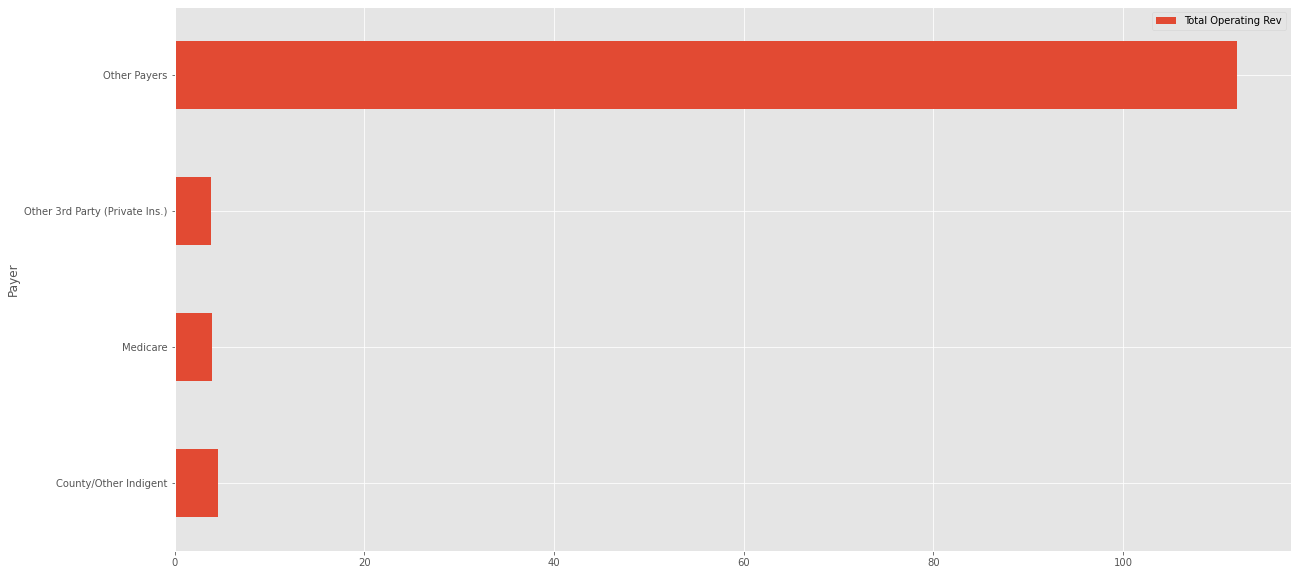

In [44]:
Revenue = (df2[['Payer','Total Operating Rev']].groupby(by=['Payer']).sum()/1000000000).plot(kind='barh',
                                                                                              figsize=(20,10))

In [45]:
new_df =new_df.drop_duplicates(['Year','Facility Name'])

In [46]:
new_df['Total Operating Rev'].sum()/1000000000

517.570991215

<AxesSubplot:xlabel='Year'>

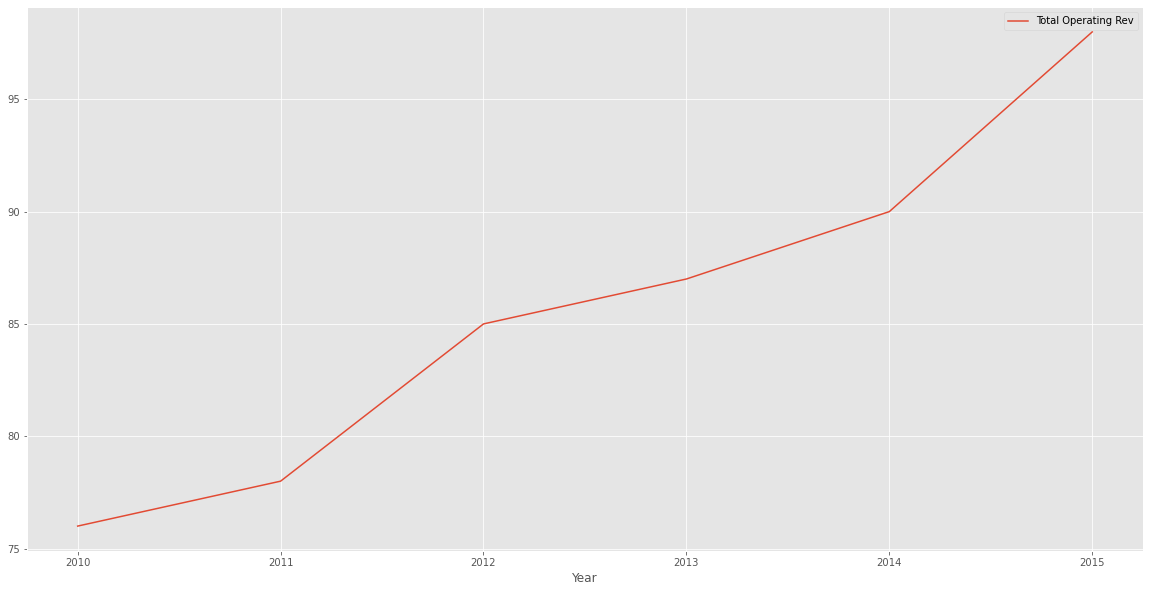

In [47]:
(new_df[['Year','Payer','Total Operating Rev']].groupby(by=['Year']).sum()/1000000000).astype(int).plot(kind='line',legend=True,figsize=(20,10))

In [68]:
new = (new_df[['Facility Name','Total Patient Days']].groupby(['Facility Name']).sum()).sort_values(by='Total Patient Days',ascending = False).head(15).reset_index()

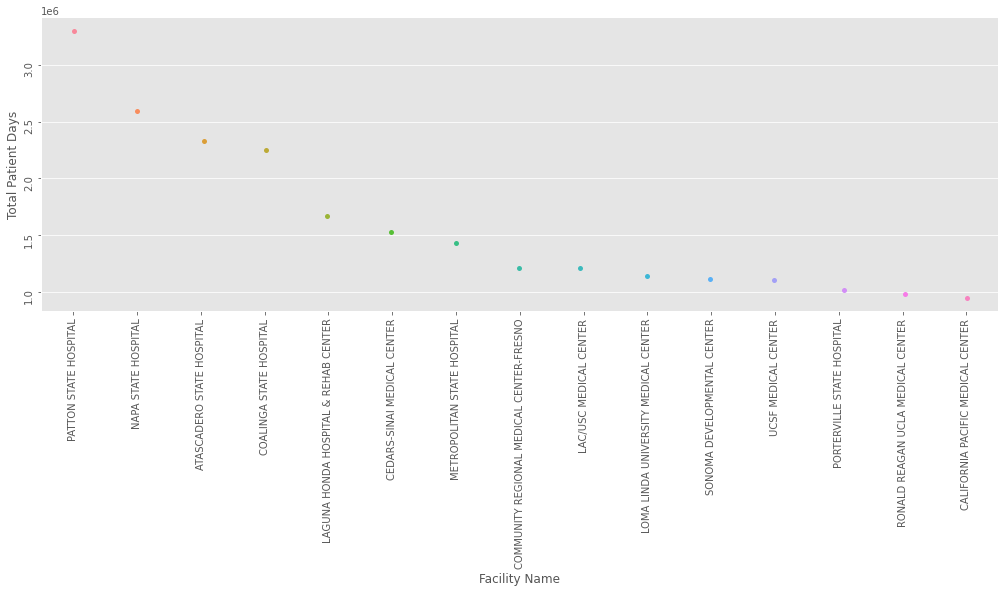

In [69]:
plotly = sns.catplot(data=new,x='Facility Name',y='Total Patient Days',aspect=3)
plotly.ax.tick_params(labelrotation = 90)

In [50]:
(new_df[['Facility Name','Total Patient Days']].groupby(['Facility Name']).sum()/1000000000).sort_values(by='Total Patient Days',ascending = False).head(15).reset_index()

,Facility Name,Total Patient Days
0,PATTON STATE HOSPITAL,0.003295
1,NAPA STATE HOSPITAL,0.002591
2,ATASCADERO STATE HOSPITAL,0.002330
3,COALINGA STATE HOSPITAL,0.002253
4,LAGUNA HONDA HOSPITAL & REHAB CENTER,0.001665
5,CEDARS-SINAI MEDICAL CENTER,0.001529
6,METROPOLITAN STATE HOSPITAL,0.001434
7,COMMUNITY REGIONAL MEDICAL CENTER-FRESNO,0.001215
8,LAC/USC MEDICAL CENTER,0.001212
9,LOMA LINDA UNIVERSITY MEDICAL CENTER,0.001139


In [51]:
(df_merged[['Loc','Facility Name','Total Patient Days']].groupby(['Facility Name']).sum()/1000000000).sort_values(by='Total Patient Days',ascending = False).head(15).reset_index()

,Facility Name,Total Patient Days
0,LAGUNA HONDA HOSPITAL & REHAB CENTER,0.007772
1,PATTON STATE HOSPITAL,0.007705
2,CEDARS-SINAI MEDICAL CENTER,0.007645
3,NAPA STATE HOSPITAL,0.006456
4,COMMUNITY REGIONAL MEDICAL CENTER-FRESNO,0.006075
5,LAC/USC MEDICAL CENTER,0.006062
6,LOMA LINDA UNIVERSITY MEDICAL CENTER,0.005695
7,UCSF MEDICAL CENTER,0.005521
8,CALIFORNIA PACIFIC MEDICAL CENTER,0.004742
9,SHARP MEMORIAL HOSPITAL,0.004566


In [52]:
df_merged[df_merged['Facility Name'] == "LOMA LINDA UNIVERSITY MEDICAL CENTER"]

,Year,OSHPD_ID,Facility Name,County,Type of Ownership,Hospital Type,Teaching,Small/Rural,Licensed Beds,Available Beds,...,Total Patient Days Percent,Payer,LTC Patient Days,Location,Pretax Net Income,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin,Loc
4727,2015,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,533.0,533.0,...,0.5,Other Payers,0,"LOMA LINDA, California\n(34.048261, -117.261123)",9.030190e+08,33697024.0,9.367160e+08,3.6,3.7,LOMA LINDA
4728,2015,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,533.0,533.0,...,21.8,Other 3rd Party (Private Ins.),0,"LOMA LINDA, California\n(34.048261, -117.261123)",9.030190e+08,33697024.0,9.367160e+08,3.6,3.7,LOMA LINDA
4729,2015,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,533.0,533.0,...,0.1,County/Other Indigent,0,"LOMA LINDA, California\n(34.048261, -117.261123)",9.030190e+08,33697024.0,9.367160e+08,3.6,3.7,LOMA LINDA
4730,2015,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,533.0,533.0,...,35.1,MediCal,0,"LOMA LINDA, California\n(34.048261, -117.261123)",9.030190e+08,33697024.0,9.367160e+08,3.6,3.7,LOMA LINDA
4731,2015,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,533.0,533.0,...,42.6,Medicare,0,"LOMA LINDA, California\n(34.048261, -117.261123)",9.030190e+08,33697024.0,9.367160e+08,3.6,3.7,LOMA LINDA
6019,2010,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,861.0,797.0,...,1.6,County/Other Indigent,0,"LOMA LINDA, California\n(34.048261, -117.261123)",1.083592e+09,37600070.0,1.121192e+09,3.4,3.5,LOMA LINDA
6020,2010,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,861.0,797.0,...,1.3,Other Payers,0,"LOMA LINDA, California\n(34.048261, -117.261123)",1.083592e+09,37600070.0,1.121192e+09,3.4,3.5,LOMA LINDA
6021,2010,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,861.0,797.0,...,28.3,Other 3rd Party (Private Ins.),0,"LOMA LINDA, California\n(34.048261, -117.261123)",1.083592e+09,37600070.0,1.121192e+09,3.4,3.5,LOMA LINDA
6022,2010,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,861.0,797.0,...,44.7,MediCal,0,"LOMA LINDA, California\n(34.048261, -117.261123)",1.083592e+09,37600070.0,1.121192e+09,3.4,3.5,LOMA LINDA
6023,2010,106361246,LOMA LINDA UNIVERSITY MEDICAL CENTER,San Bernardino,Non-Profit,Comparable,Teaching,NaN,860.5,796.5,...,24.2,Medicare,0,"LOMA LINDA, California\n(34.048261, -117.261123)",1.083592e+09,37600070.0,1.121192e+09,3.4,3.5,LOMA LINDA


Question:


Does more patient days indicate more revenue to the hospitals

In [53]:
new_df[['Facility Name','Total Patient Days','Total Operating Rev']].agg({'Total Operating Rev':'sum','Total Patient Days':'max'})/1000000000

Total Operating Rev    517.570991
Total Patient Days       0.000557
dtype: float64

In [54]:
snsplots = new_df[['Facility Name','Total Patient Days','Total Operating Rev']].groupby('Facility Name').mean().sort_values(by='Total Patient Days',ascending = False)

snsplots['Total Patient Days']=snsplots['Total Patient Days'].astype(int)
snsplots['Total Operating Rev'] = snsplots['Total Operating Rev']/1000000000
snsplots

,Total Patient Days,Total Operating Rev
Facility Name,,
PATTON STATE HOSPITAL,549230,0.380618
NAPA STATE HOSPITAL,431761,0.307426
ATASCADERO STATE HOSPITAL,388276,0.280413
COALINGA STATE HOSPITAL,375569,0.282434
LAGUNA HONDA HOSPITAL & REHAB CENTER,277573,0.120940
...,...,...
PATIENTS' HOSPITAL OF REDDING,485,0.006367
SONOMA WEST MEDICAL CENTER,411,0.002542
MENLO PARK SURGICAL HOSPITAL,360,0.019631


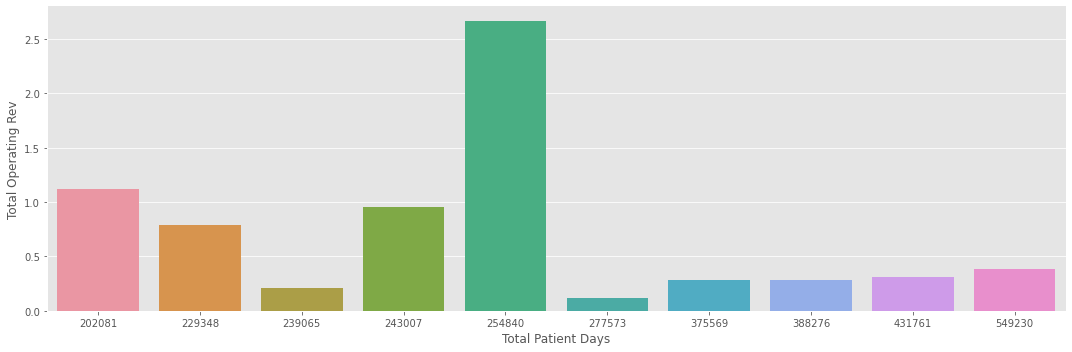

In [55]:
gave =sns.catplot(data=snsplots.head(10),x='Total Patient Days',y='Total Operating Rev',kind='bar',aspect=3)
# gave.axes.tick_params(labelrotation='90')


We can see that there is no correlation between the total patient days and the operating revenue, some generated more revenue from less patient days and some generated less revenue from more patient days

Let's take a look at the top 3 highest revenue generated facilities

In [56]:
snsplots[snsplots['Total Patient Days'].isin([254840,243007,202081])]

,Total Patient Days,Total Operating Rev
Facility Name,,
CEDARS-SINAI MEDICAL CENTER,254840,2.666343
COMMUNITY REGIONAL MEDICAL CENTER-FRESNO,243007,0.950263
LAC/USC MEDICAL CENTER,202081,1.118265


In [62]:
df2[df2['Facility Name'].isin(['CEDARS-SINAI MEDICAL CENTER','COMMUNITY REGIONAL MEDICAL CENTER-FRESNO','LAC/USC MEDICAL CENTER'])].drop_duplicates('Loc')

,Year,OSHPD_ID,Facility Name,County,Type of Ownership,Hospital Type,Teaching,Small/Rural,Licensed Beds,Available Beds,...,Total Patient Days Percent,Payer,LTC Patient Days,Location,Pretax Net Income,Other Operating Rev,Total Operating Rev,Total Margin,Operating Margin,Loc
5665,2012,106191228,LAC/USC MEDICAL CENTER,Los Angeles,City/County,Comparable,Teaching,Not Mentioned,676.0,648.0,...,0.3,Other Payers,0,"LOS ANGELES, California\n(34.052238, -118.243344)",9.037160e+08,187043037.0,1.090759e+09,17.1,20.7,LOS ANGELES
6148,2015,106100717,COMMUNITY REGIONAL MEDICAL CENTER-FRESNO,Fresno,Non-Profit,Comparable,Teaching,Not Mentioned,909.0,909.0,...,0.7,Other Payers,35772,"FRESNO, California\n(36.731654, -119.785856)",1.154188e+09,23513879.0,1.177702e+09,2.0,2.0,FRESNO


Out of those 3 values, 2 are from Los angeles and 1 is from Fresno. This says that the location of the hospitals is where the revenue is getting generated

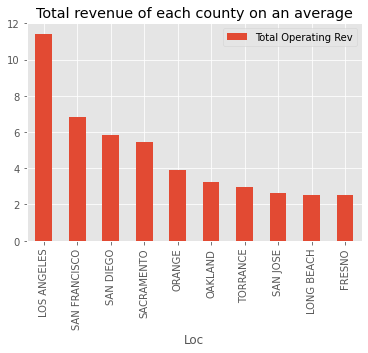

In [65]:
(df2[['Loc','Total Operating Rev']].groupby('Loc').sum()/1000000000).sort_values('Total Operating Rev',ascending=False).head(10).plot(kind='bar',
                                                                                                                                     title='Total revenue of each county on an average')
plt.show()

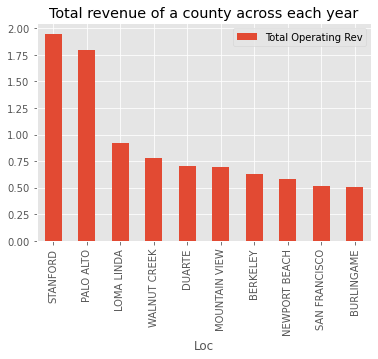

In [67]:
(df_merged[['Loc','Total Operating Rev']].groupby('Loc').mean()/1000000000).sort_values('Total Operating Rev',ascending=False).head(10).plot(kind='bar',
                                                                                                                                            title = 'Total revenue of a county across each year')
plt.show()

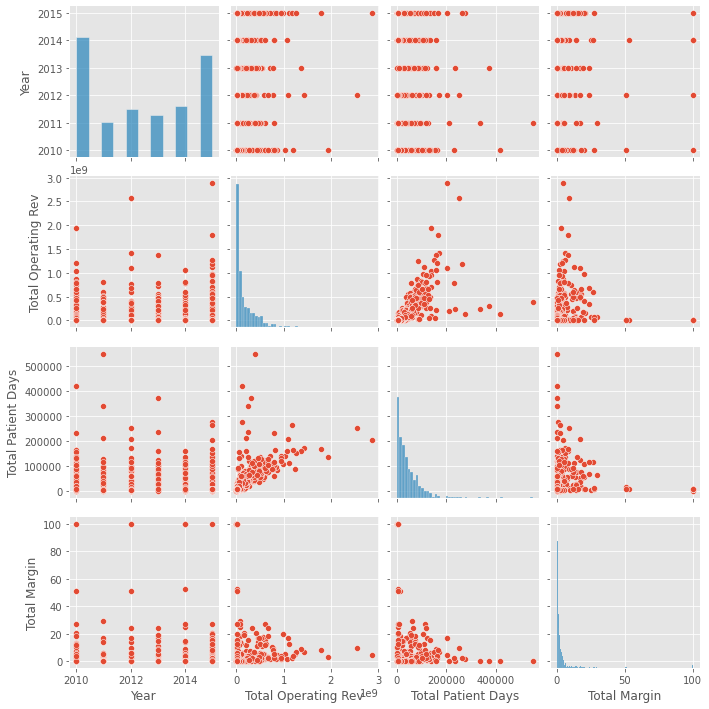

In [60]:
sns.pairplot(data=df2[['Year','Total Operating Rev','Total Patient Days','Total Margin']])

<h3>Summary</h3>

The revenue generated by the hospitals was increases year by year where it reached 517 billion by 2015. With highest revenue of 3.3 billion from a single facility.

The total Patient days in a hospital doesnot necessarily mean that the hospital is generating more revenue.

The expensive cities and counties like los angeles and san fransisco hospitals generate high revenue even the patient spent days are less in those areas. As the cost of hospital expenses are higher in those areas.

Taking all the years from 2010-2015, hospitals from Stanford and Palo Alto generated highest mean revenue which is collectively closer to 4 billion each year.
